In [ ]:
!chmod 600 ~/.passwd-s3fs

In [ ]:
!apt install s3fs

In [ ]:
!mkdir /content/s3
!s3fs um2ii-datasets /content/s3

In [ ]:
import pandas as pd
from fastai.vision.all import *
from sklearn.model_selection import train_test_split
import os
from glob import glob
from sklearn import metrics

MIMIC Race Validation on VinDr Dataset

In [ ]:
test_df = pd.read_csv('/content/VinDr_Full/VinDr_labels.csv')
test_df['Path'] = 'content/VinDr_Full/' + test_df['Path'].astype(str)

In [ ]:
mimic_race_model = load_learner('/content/mimic_race.pkl')
mimic_race_model.dls.to(device='cuda')
mimic_race_model.model.to(device='cuda')
race_test_dl = mimic_race_model.dls.test_dl(test_df)
race_preds = mimic_race_model.get_preds(dl=race_test_dl, with_decoded=True)

In [ ]:
mimic_race_model.dls.vocab

['Asian', 'Black', 'Hispanic/Latino', 'Other', 'White']

[0.73372222 0.14572222 0.00788889 0.         0.11266667]


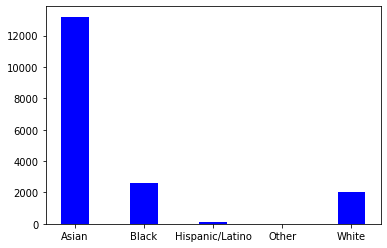

In [ ]:
race_labels = mimic_race_model.dls.vocab.o2i.keys()
prediction_counts = [race_preds[2].tolist().count(0), race_preds[2].tolist().count(1), race_preds[2].tolist().count(2), race_preds[2].tolist().count(3), race_preds[2].tolist().count(4)]
plt.bar(race_labels, prediction_counts, color ='blue', width = 0.4)
print(np.array(prediction_counts)/len(race_preds[2]))

In [ ]:
test_df.insert(len(test_df.columns), 'Race/Ethnicity_Tensor_Id', race_preds[2].numpy())
test_df.insert(len(test_df.columns), 'Race/Ethnicity_Probability', race_preds[0].numpy().tolist())
print(test_df)
test_df.to_csv('/content/sample_data/mimic_race_vindr_test.csv')

                                                          Path  Sex   Age  \
0      content/VinDr_Full/000434271f63a053c4128a0ba6352c7f.jpg    O   NaN   
1      content/VinDr_Full/00053190460d56c53cc3e57321387478.jpg    O   NaN   
2      content/VinDr_Full/0005e8e3701dfb1dd93d53e2ff537b6e.jpg    F  028Y   
3      content/VinDr_Full/0006e0a85696f6bb578e84fafa9a5607.jpg    F   NaN   
4      content/VinDr_Full/0007d316f756b3fa0baea2ff514ce945.jpg    M   NaN   
...                                                        ...  ...   ...   
17995  content/VinDr_Full/ff91fb82429a27521bbec8569b041f02.jpg    M  055Y   
17996  content/VinDr_Full/ff9fcc4087ed5e941209aa3fa948e364.jpg    F   NaN   
17997  content/VinDr_Full/ffaa288c8abca300974f043b57d81521.jpg  NaN   NaN   
17998  content/VinDr_Full/ffc441e0c8b7153844047483a577e7c3.jpg    F  050Y   
17999  content/VinDr_Full/ffccf1709d0081d122a1d1f9edbefdf1.jpg    M  069Y   

       Race/Ethnicity_Tensor_Id  \
0                             0   
1    

CheXpert Race v2 Validation on VinDr Dataset

In [ ]:
test_df = pd.read_csv('/content/VinDr_Full/VinDr_labels.csv')
test_df['Path'] = 'VinDr_Full/' + test_df['Path'].astype(str)

In [ ]:
chexpert_race2_model = load_learner('/content/chexpert_race2.pkl')
chexpert_race2_model.dls.to(device='cuda')
chexpert_race2_model.model.to(device='cuda')
race_test_dl = chexpert_race2_model.dls.test_dl(test_df)
race_preds = chexpert_race2_model.get_preds(dl=race_test_dl, with_decoded=True)

In [ ]:
chexpert_race2_model.dls.vocab

['Hispanic/Latino', 'Non-Hispanic Asian', 'Non-Hispanic Black', 'Non-Hispanic White']

<BarContainer object of 4 artists>

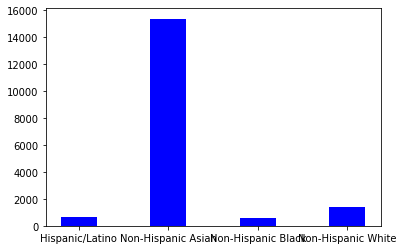

In [ ]:
race_labels = chexpert_race2_model.dls.vocab.o2i.keys()
prediction_counts = [race_preds[2].tolist().count(0), race_preds[2].tolist().count(1), race_preds[2].tolist().count(2), race_preds[2].tolist().count(3)]
plt.bar(race_labels, prediction_counts, color ='blue', width = 0.4)

In [ ]:
test_df.insert(len(test_df.columns), 'Race/Ethnicity_Tensor_Id', race_preds[2].numpy())
test_df.insert(len(test_df.columns), 'Race/Ethnicity_Probability', race_preds[0].numpy().tolist())
print(test_df)
test_df.to_csv('/content/sample_data/chexpert_race2_vindr_test.csv')

                                                  Path  ...                                                                 Race/Ethnicity_Probability
0      VinDr_Full/000434271f63a053c4128a0ba6352c7f.jpg  ...  [0.0008048051968216896, 0.9984591007232666, 4.632015588867944e-06, 0.0007314337999559939]
1      VinDr_Full/00053190460d56c53cc3e57321387478.jpg  ...     [0.009614159353077412, 0.9515663385391235, 0.0011062953853979707, 0.03771327808499336]
2      VinDr_Full/0005e8e3701dfb1dd93d53e2ff537b6e.jpg  ...        [0.04028747230768204, 0.9002412557601929, 0.01517146173864603, 0.04429987072944641]
3      VinDr_Full/0006e0a85696f6bb578e84fafa9a5607.jpg  ...     [0.012125277891755104, 0.957353413105011, 0.0036082651931792498, 0.026913048699498177]
4      VinDr_Full/0007d316f756b3fa0baea2ff514ce945.jpg  ...   [0.0006952810217626393, 0.997672975063324, 3.333433414809406e-05, 0.0015984969213604927]
...                                                ...  ...                                   